In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
df = pd.read_csv("Online Retail.csv")

# Observe and Process data

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.06220e+04,
        5.31283e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-80995., -64796., -48597., -32398., -16199.,      0.,  16199.,
         32398.,  48597.,  64796.,  80995.]),
 <a list of 10 Patch objects>)

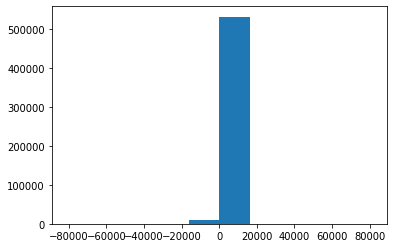

In [5]:
plt.hist(df["Quantity"])

In [6]:
df = df.loc[df['Quantity'] > 0]

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [8]:
df = df.dropna(subset=['CustomerID'])

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.shape

(397924, 8)

# Building a customer-item matrix

In [11]:
customer_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)

In [12]:
customer_item_matrix.head()


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [13]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# User-based collaborative filtering and recommendations

In [14]:
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)
user_user_sim_matrix.head()


,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [15]:
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()


CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


For example, the cosine similarity measure between customers 12347 and 12348 is 0.063022. On the other hand, the cosine similarity between customers 12347 and 12349 is 0.046130. This suggests that customer 12348 is more similar to customer 12347 than customer 12349 is to the customer 12347, based on the products that they purchased.

In [16]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False).head(10)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
16754.0    0.171499
12814.0    0.171499
12791.0    0.171499
16426.0    0.166968
16333.0    0.161690
Name: 12350.0, dtype: float64

These are the top 10 customers that are the most similar to customer 12350. Let's pick customer 17935 

First, we need to identify the items that the customers 12350 and 17935 have already bought. Then, we are going to find the products that the target customer 17935 has not purchased, but customer 12350 has. Since these two customers have bought similar items in the past, we are going to assume that the target
customer 17935 has a high chance of purchasing the items that he or she has not bought, but customer 12350 has bought. Lastly, we are going to use this list of items and recommend them to the target customer 17935.

In [17]:
items_bought_by_A = set(customer_item_matrix.loc[12350.0].iloc[
    customer_item_matrix.loc[12350.0].nonzero()
].index)
items_bought_by_A

/Users/guorong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


{'20615',
 '20652',
 '21171',
 '21832',
 '21864',
 '21866',
 '21908',
 '21915',
 '22348',
 '22412',
 '22551',
 '22557',
 '22620',
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [18]:
items_bought_by_B = set(customer_item_matrix.loc[17935.0].iloc[
    customer_item_matrix.loc[17935.0].nonzero()
].index)
items_bought_by_B

/Users/guorong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


{'20657',
 '20659',
 '20828',
 '20856',
 '21051',
 '21866',
 '21867',
 '22208',
 '22209',
 '22210',
 '22211',
 '22449',
 '22450',
 '22551',
 '22553',
 '22557',
 '22640',
 '22659',
 '22749',
 '22752',
 '22753',
 '22754',
 '22755',
 '23290',
 '23292',
 '23309',
 '85099B',
 'POST'}

In [19]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
items_to_recommend_to_B

{'20615',
 '20652',
 '21171',
 '21832',
 '21864',
 '21908',
 '21915',
 '22348',
 '22412',
 '22620',
 '79066K',
 '79191C',
 '84086C'}

In [20]:
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


get the descriptions of these items

recommendations are based on the individual customer's purchase history. For new customers, we are not going to have enough data to compare these new customers against the others

# Item-based collaborative filtering and recommendations

In [21]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.066915,0.0,0.078217
1,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016182,0.0,0.000000
2,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.070535,0.0,0.010993
3,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [22]:
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.066915,0.0,0.078217
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016182,0.0,0.000000
10120,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.070535,0.0,0.010993
10123C,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


the cosine similarity between the item with StockCode 10002 and the item with StockCode 10120 is 0.094868. On the other hand, the cosine similarity between the item 10002 and the
item 10125 is 0.090351. This suggests that the item with StockCode 10120 is more similar to that with StockCode 10002, than the item with StockCode 10125 is to that with StockCode 10002.

First, for the given product that the target customer bought, we are going to find the most similar items from the item-to-item similarity matrix that we have just built. Then, we are going to recommend these similar items to the customer, since those similar items were bought by other customers who have bought the product that the target customer initially bought.

In [23]:
item_to_recommend_customer_brought_23166 = item_item_sim_matrix["23166"].sort_values(ascending=False).iloc[:10]
item_to_recommend_customer_brought_23166 = pd.DataFrame(item_to_recommend_customer_brought_23166)
item_to_recommend_customer_brought_23166

,23166
StockCode,
23166,1.000000
23165,0.671897
23167,0.659551
22993,0.274724
23307,0.262526
22722,0.249053
22720,0.249002
22666,0.247110
23243,0.246397


In [30]:
df.loc[
       df['StockCode'].isin(item_to_recommend_customer_brought_23166.index),
       ['StockCode', 'Description']
   ].drop_duplicates().set_index('StockCode').loc[item_to_recommend_customer_brought_23166.index]

,Description
StockCode,
23166,MEDIUM CERAMIC TOP STORAGE JAR
23165,LARGE CERAMIC TOP STORAGE JAR
23167,SMALL CERAMIC TOP STORAGE JAR
22993,SET OF 4 PANTRY JELLY MOULDS
23307,SET OF 60 PANTRY DESIGN CAKE CASES
22722,SET OF 6 SPICE TINS PANTRY DESIGN
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22666,RECIPE BOX PANTRY YELLOW DESIGN
23243,SET OF TEA COFFEE SUGAR TINS PANTRY


The first item here is the item that the target customer just bought and the other nine items are the items that are frequently bought by others who have bought the first item.